In [14]:
import pandas as pd
import glob
import os

base_path = "D:/archive_6/main"
test_path = "D:/archive_6/test"
folders = ["BACTERIAL", "VIRAL", "NORMAL"]

image_paths = []
labels = []

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    for img_path in glob.glob(folder_path + "/*.jpeg"):  
        image_paths.append(img_path)
        labels.append(folder)

data = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

data

,image_path,label
0,D:/archive_6/main\BACTERIAL\person1000_bacteri...,BACTERIAL
1,D:/archive_6/main\BACTERIAL\person1001_bacteri...,BACTERIAL
2,D:/archive_6/main\BACTERIAL\person1002_bacteri...,BACTERIAL
3,D:/archive_6/main\BACTERIAL\person1003_bacteri...,BACTERIAL
4,D:/archive_6/main\BACTERIAL\person1004_bacteri...,BACTERIAL
...,...,...
5211,D:/archive_6/main\NORMAL\NORMAL2-IM-1406-0001....,NORMAL
5212,D:/archive_6/main\NORMAL\NORMAL2-IM-1412-0001....,NORMAL
5213,D:/archive_6/main\NORMAL\NORMAL2-IM-1419-0001....,NORMAL
5214,D:/archive_6/main\NORMAL\NORMAL2-IM-1422-0001....,NORMAL


In [15]:
from sklearn.model_selection import train_test_split
# train_split=.8
# test_split=.1
# dummy_split=test_split/(1-train_split)
# train_df, dummy_df=train_test_split(data, train_size=train_split, shuffle=True, random_state=123)
# test_df, valid_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)

train_df, valid_df=train_test_split(data, test_size=0.2, shuffle=True, random_state=123)

print(
    f' train_df length: {len(train_df)}\n',
    # f'test_df length : {len(test_df)}\n',
    f'valid_df length: {len(valid_df)}\n'
)

 train_df length: 4172
 valid_df length: 1044



In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [17]:
img_width=224
img_height=224
channels = 3

image_shape = (img_width,img_height,channels)
image_size = (img_width,img_height)
batch_size=64
epochs=30

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,          
    zoom_range = 0.2,  
    # horizontal_flip = True
)
val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col = 'image_path',
    y_col = 'label',
    target_size = image_size,
    class_mode='categorical',
    batch_size=batch_size,   
    shuffle=True,
)
val_generator = val_datagen.flow_from_dataframe(
    valid_df,
    x_col = 'image_path',
    y_col = 'label',
    target_size = image_size,
    class_mode='categorical',
    batch_size=batch_size, 
    shuffle=True,
)
# test_generator = test_datagen.flow_from_dataframe(
#     test_df,
#     x_col = 'image_path',
#     y_col = 'label',
#     target_size = image_size,
#     class_mode='categorical',
#     batch_size=batch_size, 
#     shuffle=False,
# )

Found 4172 validated image filenames belonging to 3 classes.
Found 1044 validated image filenames belonging to 3 classes.


In [39]:
classes=list(train_generator.class_indices.keys())
print(classes)
class_count=len(classes)

['BACTERIAL', 'NORMAL', 'VIRAL']


In [40]:
model = models.Sequential([
  layers.Conv2D(32, (3,3), padding='same', activation='relu',input_shape=image_shape),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(class_count, activation="softmax")
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Kristian\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,710,019 (98.08 MB)

 Trainable params: 25,710,019 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history=model.fit(
    x=train_generator, 
    epochs=epochs, 
    validation_data=val_generator
)

Epoch 1/30


c:\Users\Kristian\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.4211 - loss: 5.1306 - val_accuracy: 0.7088 - val_loss: 0.7052
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.6786 - loss: 0.7204 - val_accuracy: 0.7605 - val_loss: 0.5944
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.7157 - loss: 0.6483 - val_accuracy: 0.7548 - val_loss: 0.6068
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7387 - loss: 0.6157 - val_accuracy: 0.7739 - val_loss: 0.5789
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7302 - loss: 0.6257 - val_accuracy: 0.7452 - val_loss: 0.5864
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7443 - loss: 0.6010 - val_accuracy: 0.7682 - val_loss: 0.5787
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7472 - loss: 0.5879 - val_accuracy: 0.7759 - val_loss: 0.5627
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7603 - loss: 0.5697 - val_accuracy: 0.6954 - val_loss: 0.

In [44]:
import matplotlib.pyplot as plt

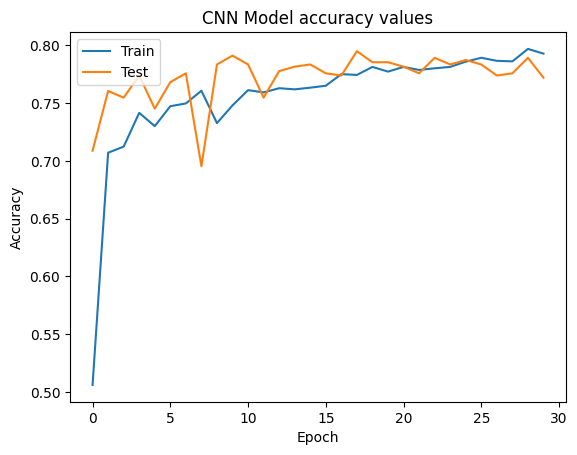

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

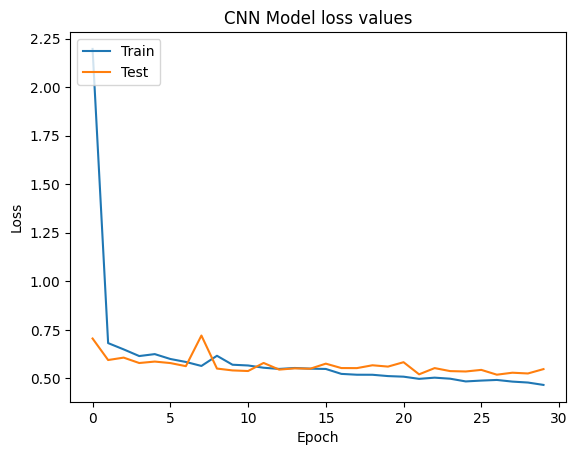

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss values')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [48]:
import numpy as np

# Predict the classes
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

c:\Users\Kristian\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 664ms/step


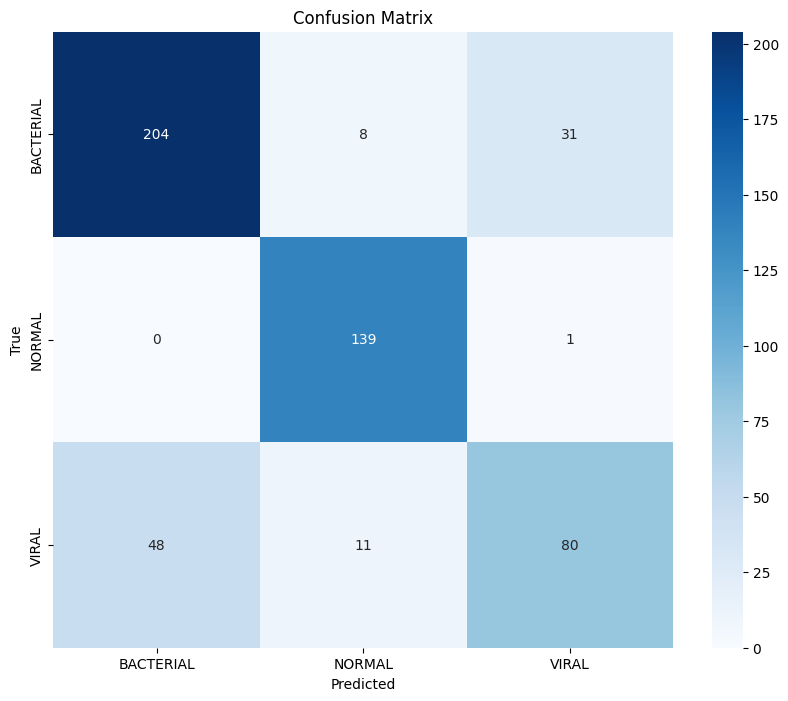

Classification Report
              precision    recall  f1-score   support

   BACTERIAL       0.81      0.84      0.82       243
      NORMAL       0.88      0.99      0.93       140
       VIRAL       0.71      0.58      0.64       139

    accuracy                           0.81       522
   macro avg       0.80      0.80      0.80       522
weighted avg       0.80      0.81      0.80       522



In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Optionally, print a classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
